
## Ejercicio 1

(5 puntos) Estudiamos en primer lugar un modelo llamado "perros y pulgas", o también de las "urnas de Ehrenfest".  Suponemos dos perros $A$ y $B$ tales que en el instante $t=0$ $A$ tiene $n$ pulgas (numeradas de $0$ a $n-1$) y $B$ ninguna.  Los perros están durmiendo uno al lado del otro y las pulgas pueden saltar de uno a otro sin problema. La regla de evolución del sistema es la siguiente: Si en el instante $t$, $L_A(t)$  y $L_B(t)$ son las listas de pulgas en $A$ y $B$, elegimos un entero aleatorio en el intervalo cerrado  $[0,n-1]$ y la pulga que lleva ese número salta cambiando de perro. Así obtenemos las nuevas listas $L_A(t+1)$  y $L_B(t+1)$ que determinan el estado del sistema en el instante $t+1$ (el tiempo es, como en otros ejemplos que hemos considerado,  discreto $t=0,1,2,3,\dots$).  

A) En primer lugar programa una función $siguiente(n,L_A,L_B)$ que reciba el estado del sistema en un instante  y devuelva el estado en el siguiente. 

B) Realiza un gráfico que represente, comenzando con $1000$ pulgas en $A$,  la evolución temporal del número de pulgas en $B$.  Debe observarse claramente la estabilización del número de pulgas, y, a partir de ese momento, oscilaciones pequeñas.

C) Cambia la función del apartado $A$ por otra,  $siguiente1(n,n_B)$,  que únicamente tenga en cuenta el número de pulgas en el perro $B$, ya que todas las demás están en el perro $A$. A fin de cuentas, ¿qué nos importa cómo se llama la pulga que ha saltado al pasar del instante $t$ al $t+1$? Nos debe bastar con saber cuántas pulgas hay en cada perro, y el comportamiento del sistema debe ser el mismo que con  la versión en el apartado A).  Repite el gráfico del apartado B) y comprueba que se obtiene, esencialmente, el mismo.

D) Estudia ahora la siguiente variante del modelo: para pasar del estado $t$ al $t+1$:

1) Elegimos aleatoriamente uno de los dos perros. 

2) Cada perro tiene una probabilidad,  $p_A$ o $p_B$ que no cambia, de que una pulga salte al otro.

3) Cuando un perro ha sido elegido en el sorteo realizado en 1) y tiene pulgas, una pulga salta al otro perro con probabilidad  $p_A$, si se trata del perro $A$, o $p_B$ si el elegido es $B$.

¿Se estabiliza el número de pulgas en cada perro? A largo plazo, ¿qué se obtiene para el número de pulgas en $B$? La respuesta dependerá de los valores de $p_A$ y $p_B$ utilizados, y para responder se pueden realizar gráficos con diferentes valores de las probablidades.



In [1]:
## Apartado A)
def siguiente(n,L_A,L_B):
        e = randint(0,n-1)
        if e in L_A:
            J = L_A.index(e)
            L_A.pop(J)
            L_B.append(e)
        else:
            J = L_B.index(e)
            L_B.pop(J)
            L_A.append(e)
        return L_A,L_B

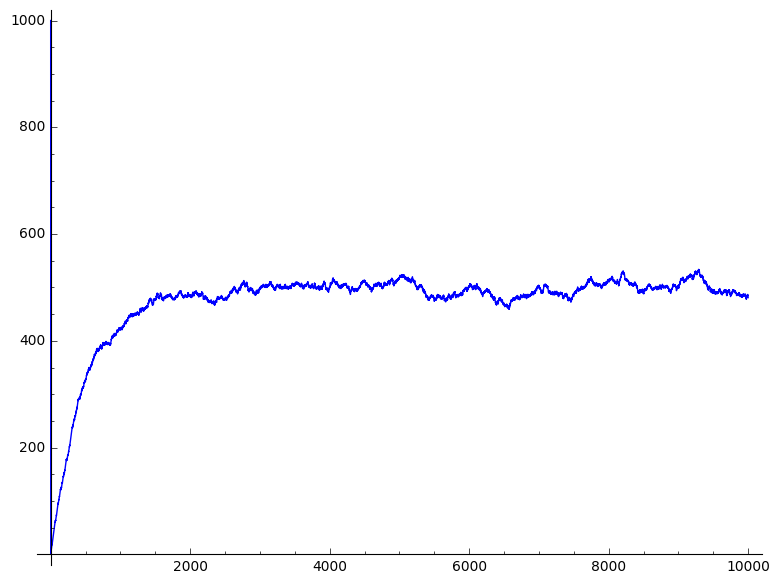

In [2]:
## Apartado B)
def evolucion(n,N):
    L_A,L_B = srange(n),[]
    RES = [n]
    for _ in xsrange(N):
        L_B = siguiente(n,L_A,L_B)[1]
        RES.append(len(L_B))
    return RES

line(zip(srange(10**4),evolucion(1000,10**4)))

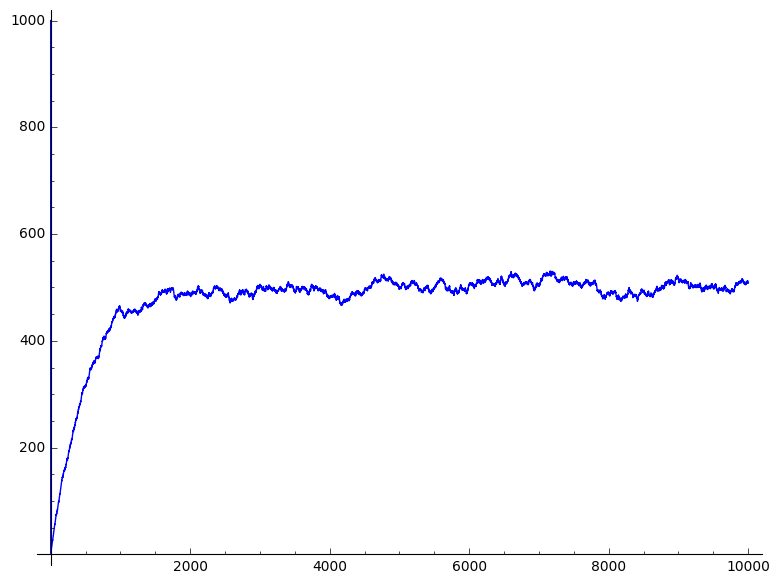

In [3]:
## Apartado C)

def siguiente1(n,n_B):
        n_A = n-n_B
        e = randint(0,n-1)
        if e < n_A:
            n_A -= 1
            n_B += 1
        else:
            n_A += 1
            n_B -= 1
        return n_B

def evolucion1(n,N):
    n_A,n_B = n,0
    RES1 = [n]
    for _ in xsrange(N):
        n_B = siguiente1(n,n_B)
        RES1.append(n_B)
    return RES1

line(zip(srange(10**4),evolucion1(1000,10**4)))            


Una vez que se estabiliza, el número medio de pulgas en cada perro parece ser $1000/2=500.$

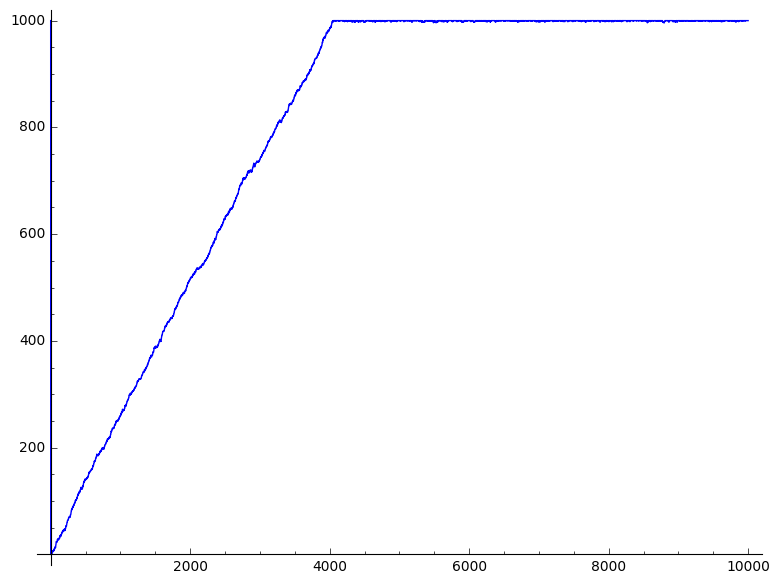

In [4]:
## Apartado D)

def siguiente2(n,n_B,p_A,p_B):
        n_A = n-n_B
        e = randint(0,1)
        if e == 0 and random()< p_A and n_A>0:
            n_A -= 1
            n_B += 1
        elif e == 1 and random()< p_B and n_B >0:
            n_A += 1
            n_B -= 1
        return n_B

def evolucion2(n,N,p_A,p_B):
    n_A,n_B = n,0
    RES2 = [n]
    for _ in xsrange(N):
        n_B = siguiente2(n,n_B,p_A,p_B)
        RES2.append(n_B)
    return RES2

line(zip(srange(10**4),evolucion2(1000,10**4,0.7,0.2)))            
   

Aparentemente, la población de pulgas en $B$ se estabiliza, pero la evolución es bastante diferente a la de la simulación anterior. Probando con diversos valores de $p_A$ y $p_B$ vemos que si $p_A$ es muy bajo respecto a $p_B$ casi todas las pulgas se quedan en $A$, y si es muy alto respecto a $p_B$ todas las pulgas terminan en $B$. Esto es bastante razonable: si las pulñgas, por algún motivo, prefieren quedarse en $A$ se quedan en $A$, y si prefieren emigrar emigran. 

(No incluido en la pregunta) 
Desgraciadamente el notebook de Jupyter no admite gráficos interactivos 3D. Entonces, he seleccionado dos imágenes del gráfico que representa los puntos finales de la simulación para valores de $p_A$ y $p_B$ variando con incrementos de $0.1$.

In [5]:
%time L = [(p,q,(evolucion2(1000,10**4,0.1*p,0.1*q)[-1]/10**3).n()) for p in srange(0,11) for q in srange(0,11)]

(list_plot3d(L,point_list=True)).save('fig1.png')
(list_plot3d(L,point_list=True)).rotateZ(pi/2).save('fig2.png')



CPU times: user 5.99 s, sys: 88 ms, total: 6.08 s
Wall time: 5.98 s


/usr/lib/sagemath/local/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


¿Qué vemos en estas imágenes? Parecen indicar que el cambio de comportamiento ocurre, más o menos,  en la diagonal del cuadrado. Es decir, si $p_A>p_B$ todas las pulgas terminan en $B$ y si $p_A<p_B$ todas terminan en $B$. ¿Es esto totalmente cierto?

## Ejercicio 2

(5 puntos)  Supongamos una baraja de cartas inicialmente ordenada. Conocemos, con absoluta certeza, dónde está cada carta de la baraja. Cuando empezamos a barajar la incertidumbre va aumentando, y queremos estudiar este proceso de "aumento de incertidumbre".  Representamos el estado inicial de la baraja de $n$ cartas mediante la lista $srange(n)$, y cualquier estado mediante una reordenación de esta lista.

A) Define una función $barajar(L)$ que reciba una lista, que representa un estado de la baraja, y devuelva la lista $L$ barajada una única vez de acuerdo al siguiente algoritmo:
    
    1) Producimos, aleatoriamente con igual probabilidad de cero o uno,  una lista $LA$  de ceros y unos de longitud $n$. Sea $k$ el número de ceros que hemos obtenido.
    
    2) Llamemos $L1$ a la sublista de $L$ formada por los primeros $k$ elementos de $L$ y $L2$ al resto de $L$.
    
    3) Sea $L3$, inicialmente una lista vacía, la lista en la que vamos a guardar la reordenación de la lista $L$. Recorremos la lista $LA$ y cada vez que encontramos un cero pasamos el primer elemento de la lista $L1$ a $L3$, y cada vez que encontramos un $1$ pasamos el primer elemento de $L2$ a $L3$.
    
    4) Al terminar devolvemos $L3$. Se llama a esta forma de barajar *riffle shuffle*.

B) ¿Qué es un estado del sistema en este caso? Podríamos decir que es una permutación de la lista $srange(n)$, pero en nuestra situación de incertidumbre acerca de la ordenación obtenida después de barajar es mejor decir que *un estado del sistema es una distribución de probabilidad sobre el conjunto de las $n!$ reordenaciones de la lista*, y, más concretamente, *una lista de $n!$ reales positivos $p_i$ tales que su suma total es $1$*. 

En el estado inicial de la baraja podemos suponer que el estado es $[1,0,0,\dots,0,0]$, y cualquier estado sobre el que no hay incertidumbre tendría un $1$ en algún lugar y el resto serían ceros. En cambio, si barajamos, una o varias veces, y no miramos la ordenación obtenida el estado es una distribución de probabilidad que nos dice cómo de probable es cada reordenación.
 
 C) ¿Cómo se mide la cantidad de información? Claude Shannon, creador en 1948 de la teoría de la información, llegó a una solución que ya era conocida en física con el nombre de *entropía*. Concretamente, si $L$ es una lista que representa una distribución de probablidad sobre $N$ objetos, definió su cantidad promedio de información en bits $I(L)$ en la forma
 $$I(L)=-\sum_{p_i\in L}p_ilog_2(p_i),$$
 de forma que un estado seguro (sin incertidumbre alguna)  tiene una cantidad de información nula.
 
 D) Como $n!$ crece bestialmente con $n$, no es posible realizar el experimento que propongo con una baraja real de $52$ cartas. Tomamos entonces $n=7$, y se trata de averiguar, mediante un experimento adecuadamente planeado,    cuántas veces debemos barajar hasta que  el contenido de información del estado  resultante (la incertidumbre) es  máximo. En ese momento podremos decir que *``la baraja ha sido bien barajada''*.

 

In [6]:
def barajar(L):
    L1 = []
    n = len(L)
    R1 = [randint(0,1) for muda in srange(n)]
    caras = R1.count(0)
    LI = L[:caras]
    LR = L[caras:]
    for bit in R1:
        if bit == 0:
            L1.append(LI[0])
            LI = LI[1:]
        else:
            L1.append(LR[0])
            LR = LR[1:]
    return L1
    
barajar(srange(7))   

[0, 4, 1, 5, 2, 6, 3]

In [7]:
def repetir(L,k):
    for muda in srange(k):
        L = barajar(L)
    return L

repetir(srange(7),4)

[4, 5, 1, 3, 2, 0, 6]

In [8]:
def multibarajar(n,k,N):
    '''Calculamos experimentalmente la distribucion de probabilidad 
    obtenida al barajar k veces'''
    L = srange(n)
    P = map(tuple,Permutations(L))
    diccionario = dict(zip(P,[0.0]*factorial(n)))
    for muda in xsrange(N):
        L1 = repetir(L,k)
        diccionario[tuple(L1)] += 1
    return diccionario

%time dicc = multibarajar(7,3,10**5)

def informacion(diccionario,n,N):
    '''Calculamos el valor de la funcion de Shannon'''
    inf = 0.0
    for key in diccionario:
        if diccionario[key] != 0.0:
            inf -= ((diccionario[key]/N)*log((diccionario[key]/N),base=2)).n()
    return inf
        
print informacion(dicc,7,10**5)    

CPU times: user 18.5 s, sys: 284 ms, total: 18.8 s
Wall time: 18.5 s
11.8962766494338


In [9]:
%time RES = [informacion(multibarajar(7,k,10**4),7,10**4) for k in srange(1,20)]; print RES

[6.79604756716189, 10.5196212480222, 11.5319224826053, 11.7892083550740, 11.8462520103615, 11.8733753480668, 11.8688692251758, 11.8810501626254, 11.8887613028289, 11.8772414872468, 11.8810268389952, 11.8788331229579, 11.8842867142803, 11.8986822378406, 11.8831574135341, 11.8903598272930, 11.8758011498516, 11.8870571328983, 11.8829710754845]
CPU times: user 1min 45s, sys: 896 ms, total: 1min 46s
Wall time: 1min 45s


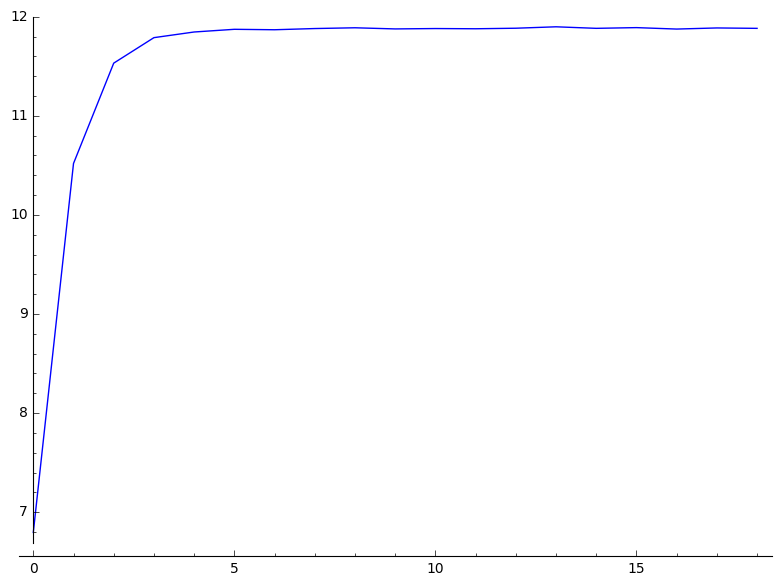

In [10]:
line(zip(srange(19),RES))

Vemos que barajando  cuatro o cinco veces ya no aumenta la cantidad de información.